# Реализация U-Net
В этом уроке мы создадим еще более качественную FCN модель на основе архитектуры UNet. Кроме использовавшихся ранее слоёв, здесь также будут участвовать Skipped Connections (проброшенные связи).

### Загрузка необходимых библиотек
Здесь мы загружаем различне библиотеки, включая TensoFlow.

В TensorFlow инициируем режим жадного (eager) выполнения и проверяем версию (должна быть 1.14)

In [42]:
import numpy as np

import tensorflow as tf

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.6.0


### Создание UNet модели
Так как UNet имееет разветвления, мы не сможем создать её с помощью `tf.keras.Sequential`. Остаётся либо создать свой собственный класс, либо использовать функциональный API. Так как граф у нас будет статический (без каких-то условных ветвлений), и нам потом желательно визуализировать полученный граф, чтобы проверить, что мы всё соединили правильно, мы будем использовать именно функциональный API.

В архитектуре UNet для понижения размерности используется MaxPooling, а для повышения -- Conv2DTranspose (Транспонированная свёртка, Upconv). Кроме того, присутствуют проброшенные связи (skipped connections): некоторые тензоры из Энкодера конкатенируются по канальному измерению (axis=3) с тензорами из Декодера. В остальном эта модель очень похожа на обычныйю Encoder-Decoder нейросеть из предыдущего практического урока.

В отличие от классической UNet архитектуры, мы во всех слоях  будем использовать `padding='same'`, чтобы избавиться от необходимости делать crop при конкатинации тензоров из разных участков сети.

In [43]:
def build_model():
    x = tf.keras.layers.Input((256, 256, 3))
    
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    out1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out1)

    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out2)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out3 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out4 = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out4)

    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out4, out], axis=3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out3, out], axis=3)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out2, out], axis=3)

    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out1, out], axis=3)

    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(out)

    return tf.keras.Model(inputs=x, outputs=out)

model = build_model()

### Визуализация графа модели UNet

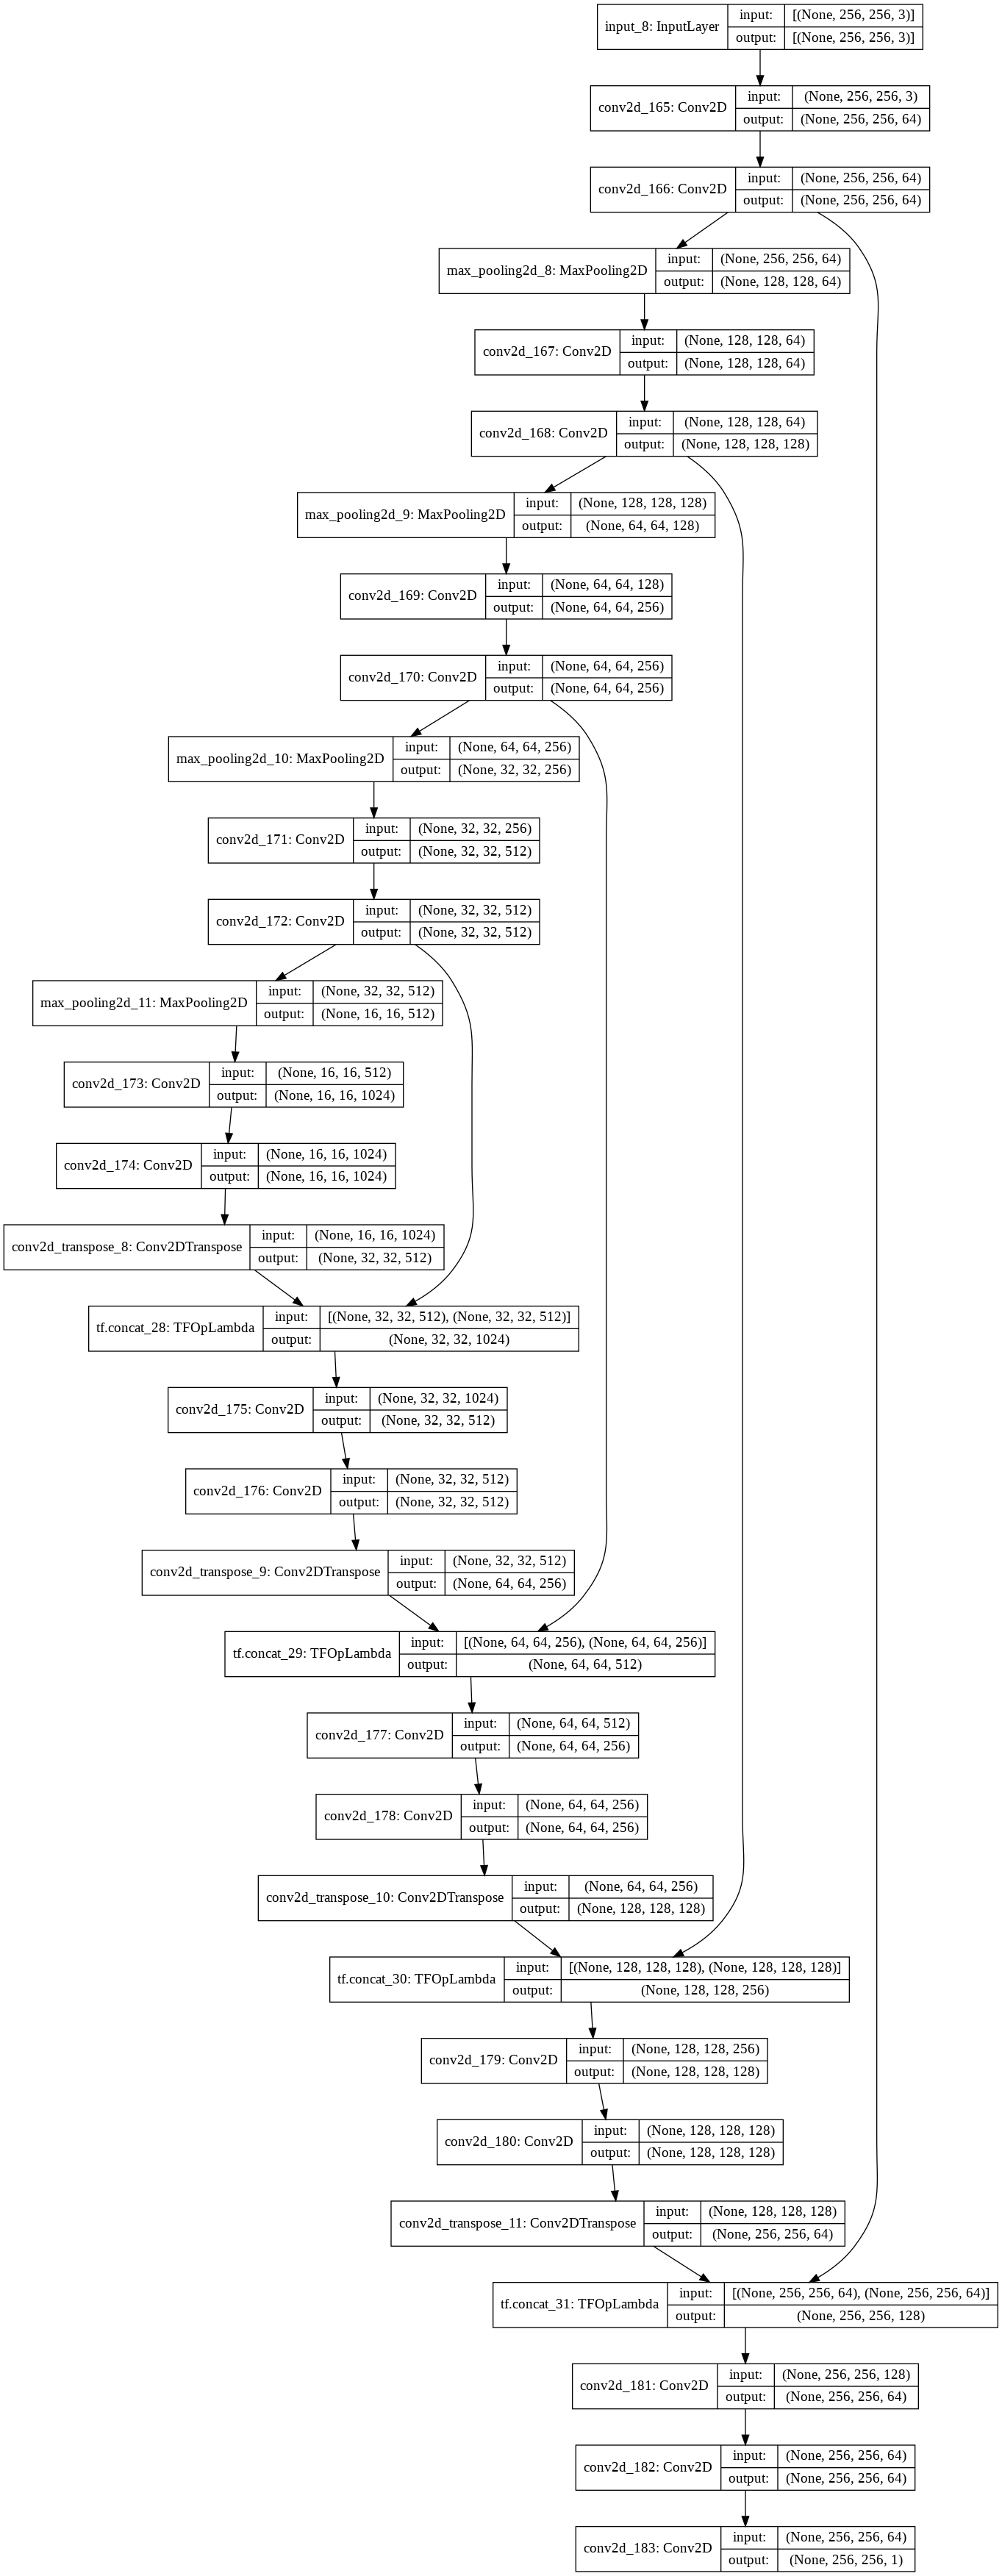

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Задания


 Создайте новую модель, аналогичную описанной выше, в котрой замените все Pooling слои на свёрточные слои со страйдом 2


In [113]:
def build_model():
    x = tf.keras.layers.Input((256, 256, 3))
    
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    out1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(out1)

    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(out2)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out3 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(out3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out4 = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(out4)

    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)


    out = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out4, out], axis=3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out3, out], axis=3)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out2, out], axis=3)

    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out1, out], axis=3)

    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(out)
    
    return tf.keras.Model(inputs=x, outputs=out)

model1 = build_model()

loss = tf.keras.losses.BinaryCrossentropy()
model1.compile(optimizer='adam', loss=loss)

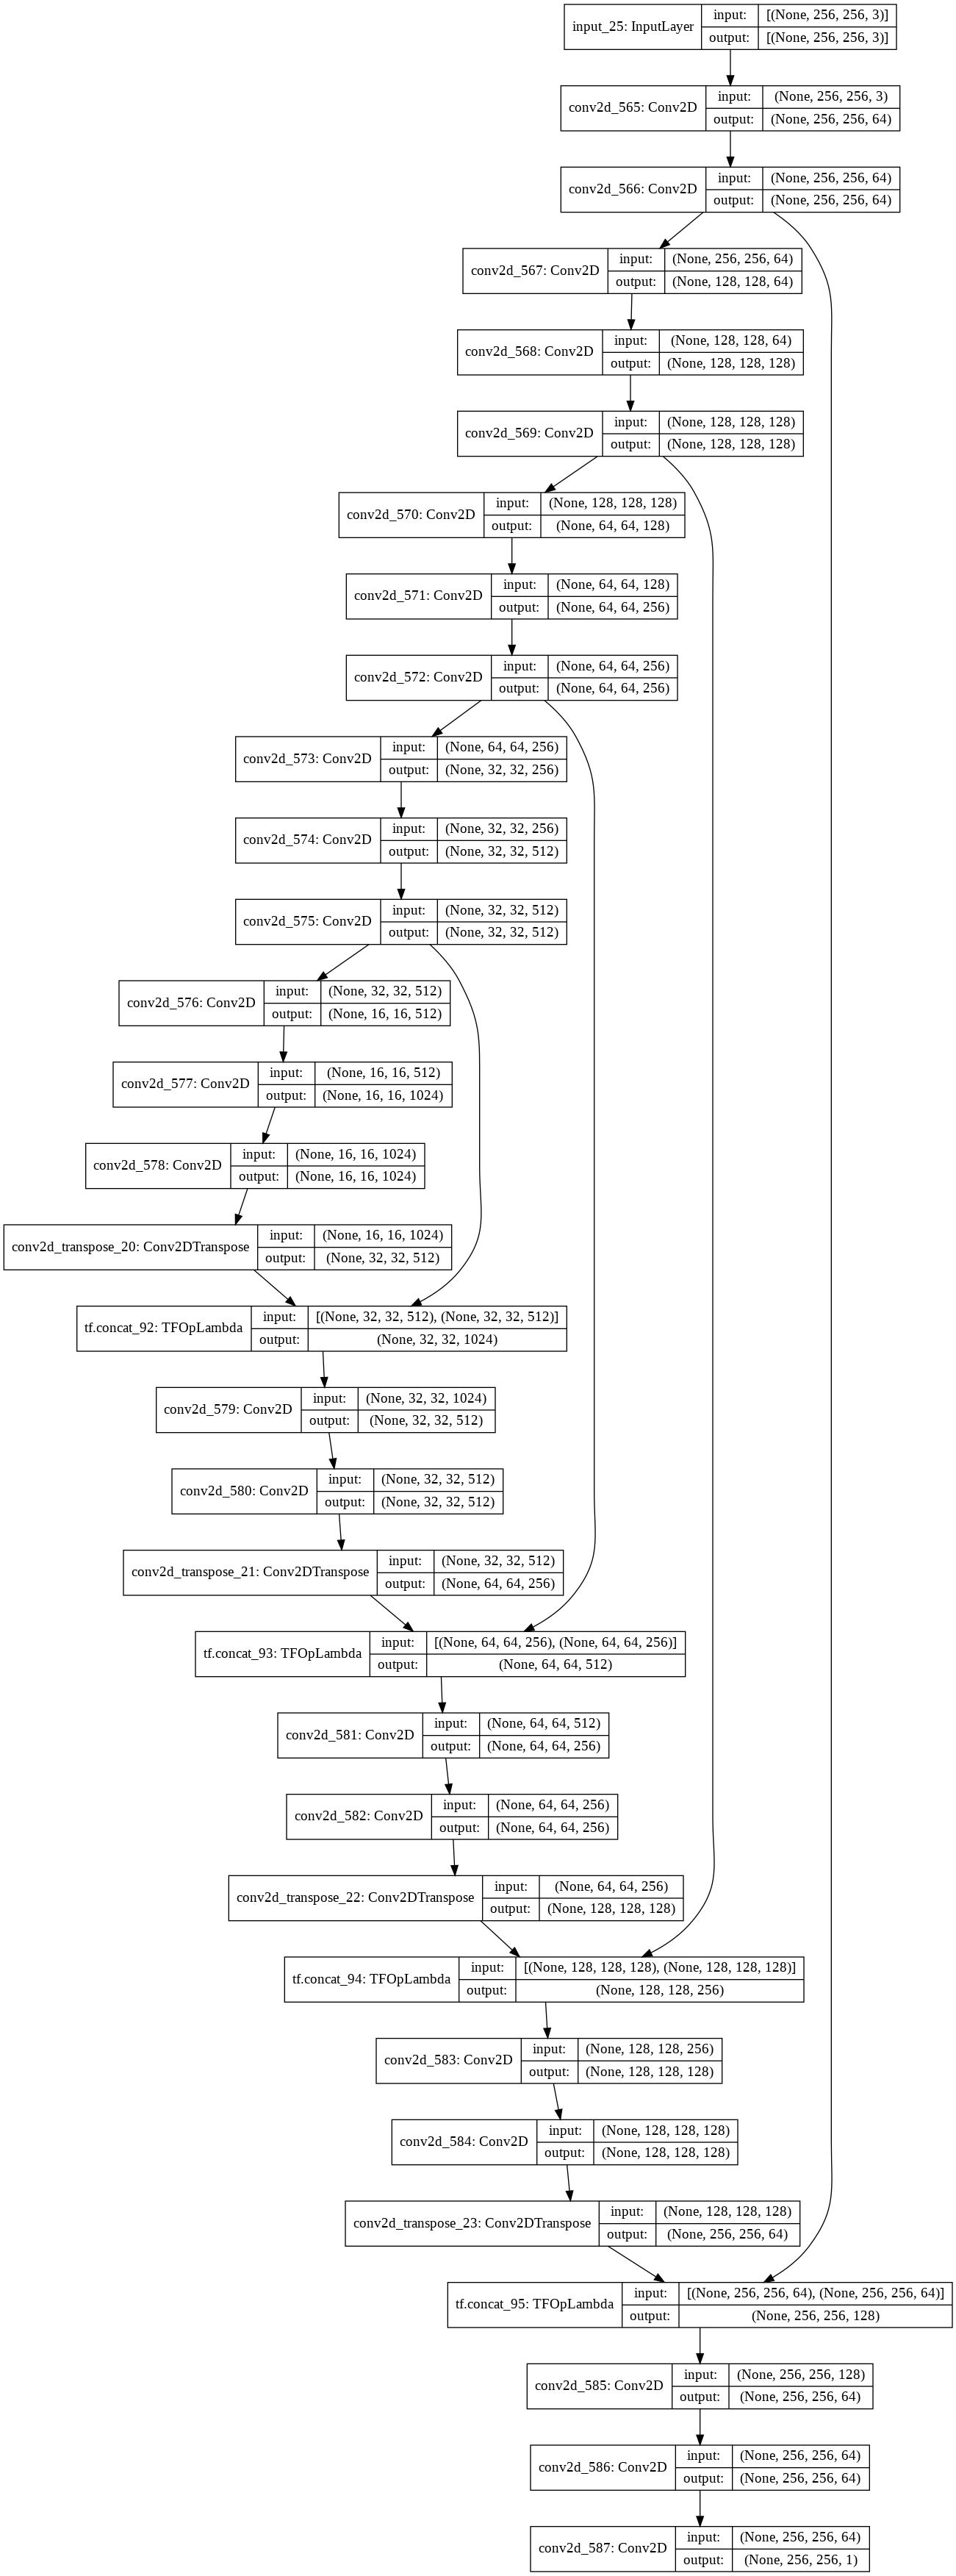

In [118]:
tf.keras.utils.plot_model(model1, show_shapes=True)

Реализуйте пайплайн обучения для UNet модели: подготовка данных, лосс, обучение, тестирование. Используйте материалы из предыдущего практического урока. Обучите модель и сравните время обучения с временем обучения более простых версий FCN из предыдущих уроков.

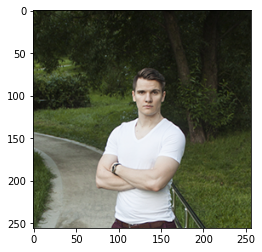

In [3]:
import random
import imageio
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

img = imageio.imread('sample_data/me_256.png')
img = img.astype(np.float32) / 255.
_=plt.imshow(img)

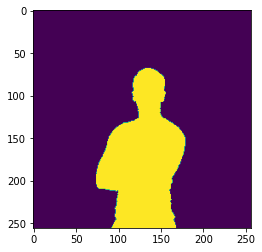

In [5]:
gt = imageio.imread('sample_data/me_gt_256.png')
gt = gt.astype(np.float32) / 255.
gt = np.mean(gt, axis=2)[...,None]
_=plt.imshow(gt[...,0])

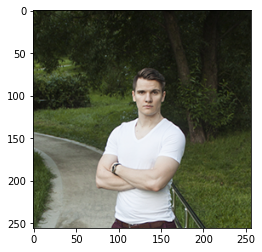

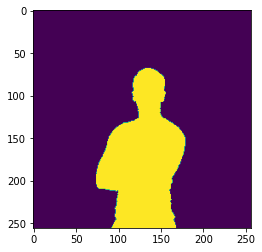

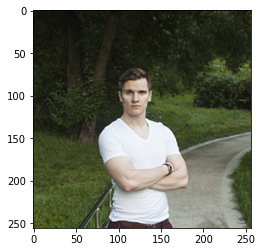

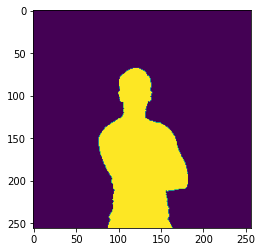

(<matplotlib.image.AxesImage at 0x7f8ffe9e7c50>, None)

In [6]:
train_x = np.stack((img, img[:,::-1,:]))
train_y = np.stack((gt, gt[:,::-1,:]))

plt.imshow(train_x[0]), plt.show()
plt.imshow(train_y[0][...,0]), plt.show()
plt.imshow(train_x[1]), plt.show()
plt.imshow(train_y[1][...,0]), plt.show()

In [114]:
NUM_EPOCHS=100
history = model1.fit(train_x, train_y, batch_size=1, epochs=NUM_EPOCHS)

Epoch 1/100
2/2 [==============================] - 2s 309ms/step - loss: 0.6899
Epoch 2/100
2/2 [==============================] - 1s 298ms/step - loss: 0.6683
Epoch 3/100
2/2 [==============================] - 1s 300ms/step - loss: 0.5928
Epoch 4/100
2/2 [==============================] - 1s 300ms/step - loss: 0.4615
Epoch 5/100
2/2 [==============================] - 1s 299ms/step - loss: 0.4435
Epoch 6/100
2/2 [==============================] - 1s 300ms/step - loss: 0.2806
Epoch 7/100
2/2 [==============================] - 1s 298ms/step - loss: 0.2388
Epoch 8/100
2/2 [==============================] - 1s 297ms/step - loss: 0.2063
Epoch 9/100
2/2 [==============================] - 1s 303ms/step - loss: 0.2063
Epoch 10/100
2/2 [==============================] - 1s 303ms/step - loss: 0.2016
Epoch 11/100
2/2 [==============================] - 1s 298ms/step - loss: 3.4056
Epoch 12/100
2/2 [==============================] - 1s 294ms/step - loss: 0.1926
Epoch 13/100
2/2 [===================

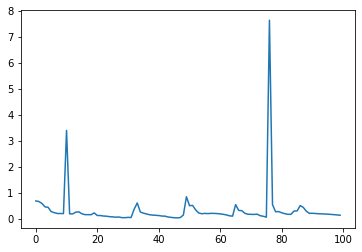

In [115]:
plt.plot(history.history['loss'])

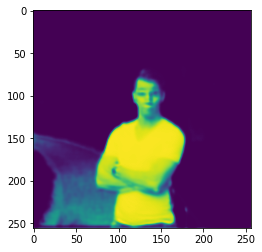

In [116]:
out = model1.predict(img[None, ...])
_=plt.imshow(out[0, ..., 0])

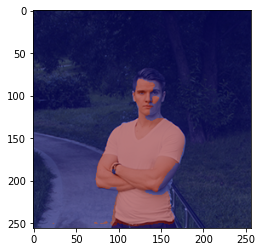

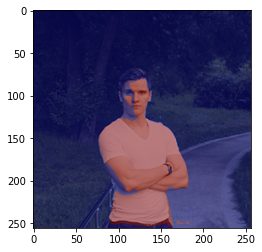

In [117]:
for sample in train_x:
    out = model1.predict(sample[None, ...])
    seg_map = (out[0, ..., 0]>0.5).astype(np.float32)
    seg_map_clr = plt.get_cmap('jet')(seg_map)[..., :3]
    plt.imshow(sample*0.5 + seg_map_clr*0.5)
    plt.show()